# Assignment 1

### <font color='green'>1. Load the file 'dengue_features_train.csv', display the top 3 rows and observe the data. Then programmatically define the column names to make the following changes. </font>



In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from cf_matrix import make_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
# Loading required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from math import sqrt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("dengue_features_train.csv")
data.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


###### a). rename columns which have 'station' such that 'station' is abbreviated to 'stn' and rest of column name remains intact. For example column name 'station_diur_temp_rng_c' is renamed to 'station_diur_tmp_rng_c'

In [4]:
data.columns = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'stn_avg_temp_c', 'stn_diur_temp_rng_c', 'stn_max_temp_c',
       'stn_min_temp_c', 'stn_precip_mm']

###### b). similarly rename columns which have 'reanalysis' to abbreviate 're_an', retaining rest of column name same

In [5]:
data.columns = data.columns.str.replace(r"reanalysis", "re_an")

###### c). rename columns which have 'humidity' to abbreviate to 'hd', retaining rest of column name same

In [6]:
data.columns = data.columns.str.replace(r"humidity", "hd")

###### d). abbreviate 'precipitation' part of column name to 'prec', retaining rest of column name same

In [7]:
data.columns = data.columns.str.replace(r"precipitation","prec")

###### e). view top 3 rows and recheck if column name changes have taken effect

In [8]:
data.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


###### f). check the type of columns in dataframe

In [9]:
data.dtypes

city                           object
year                            int64
weekofyear                      int64
week_start_date                object
ndvi_ne                       float64
ndvi_nw                       float64
ndvi_se                       float64
ndvi_sw                       float64
prec_amt_mm                   float64
re_an_air_temp_k              float64
re_an_avg_temp_k              float64
re_an_dew_point_temp_k        float64
re_an_max_air_temp_k          float64
re_an_min_air_temp_k          float64
re_an_precip_amt_kg_per_m2    float64
re_an_relative_hd_percent     float64
re_an_sat_precip_amt_mm       float64
re_an_specific_hd_g_per_kg    float64
re_an_tdtr_k                  float64
stn_avg_temp_c                float64
stn_diur_temp_rng_c           float64
stn_max_temp_c                float64
stn_min_temp_c                float64
stn_precip_mm                 float64
dtype: object

###### g). Change the column 'year' as categorical variable and check if the column data type is changed and the levels of category are correct. As an example, 'city' is converted into categorical below with two categories (of cities).

In [10]:
data.city = data.city.astype('category')
data.city.dtypes

CategoricalDtype(categories=['iq', 'sj'], ordered=False)

## <font color='green'>2. The predictor column (y-value) is present in the file 'dengue_labels_train.csv'. Read this file in a new dataframe and merge it with the above dataframe using city, year and weekofyear as join conditions. </font>

###### Count NANs in merged dataframe and use forward fill method to fill NANs (df_merged.fillna(method='ffill'))

In [11]:
y_train = pd.read_csv("dengue_labels_train.csv")

In [12]:
new_df = pd.merge(data, y_train,  how='left', left_on=['city','year','weekofyear'],right_on=['city','year','weekofyear'])
print(new_df.isna().sum())

city                            0
year                            0
weekofyear                      0
week_start_date                 0
ndvi_ne                       194
ndvi_nw                        52
ndvi_se                        22
ndvi_sw                        22
prec_amt_mm                    13
re_an_air_temp_k               10
re_an_avg_temp_k               10
re_an_dew_point_temp_k         10
re_an_max_air_temp_k           10
re_an_min_air_temp_k           10
re_an_precip_amt_kg_per_m2     10
re_an_relative_hd_percent      10
re_an_sat_precip_amt_mm        13
re_an_specific_hd_g_per_kg     10
re_an_tdtr_k                   10
stn_avg_temp_c                 43
stn_diur_temp_rng_c            43
stn_max_temp_c                 20
stn_min_temp_c                 14
stn_precip_mm                  22
total_cases                     0
dtype: int64


In [13]:
new_df = new_df.fillna(method='ffill')
new_df.shape

(1456, 25)

In [14]:
new_df.to_csv("assignment_2_file.csv", index=False)

###### a). Do a random check by printing few values from both files and merged file

In [15]:
data.iloc[[230]]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
230,sj,1994,39,1994-10-01,NaN,NaN,NaN,NaN,55.88,299.508571,...,45.2,80.372857,55.88,17.248571,2.6,28.014286,6.7,33.9,23.3,31.5


In [16]:
y_train.iloc[[230]]

,city,year,weekofyear,total_cases
230,sj,1994,39,395


In [17]:
new_df.iloc[[230]]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
230,sj,1994,39,1994-10-01,0.04585,0.076225,0.0955,0.192925,55.88,299.508571,...,80.372857,55.88,17.248571,2.6,28.014286,6.7,33.9,23.3,31.5,395


###### b). Do a scatter plot of weekofyear on x-axis and total_cases on y-axis and observe if there is a relationship.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11,8)})

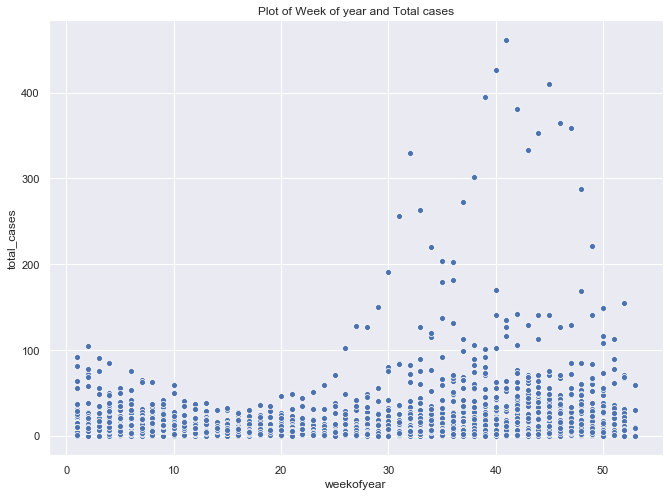

In [19]:
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(x="weekofyear", y="total_cases", data=new_df)
plt.title("Plot of Week of year and Total cases")
plt.show()

###### There seems a kind off normal distribution between weeks 20 and 50. and for the weeks 0 to 20 it has a decreasing curve 

###### c). Do a box plot to observe the density of data and if it complies to Central Limit Theorem (for large enough data, mean of sample is mean of population, or data is tightly packed close to the mean)

Text(0.5, 1.0, 'Box plot of the Total cases')

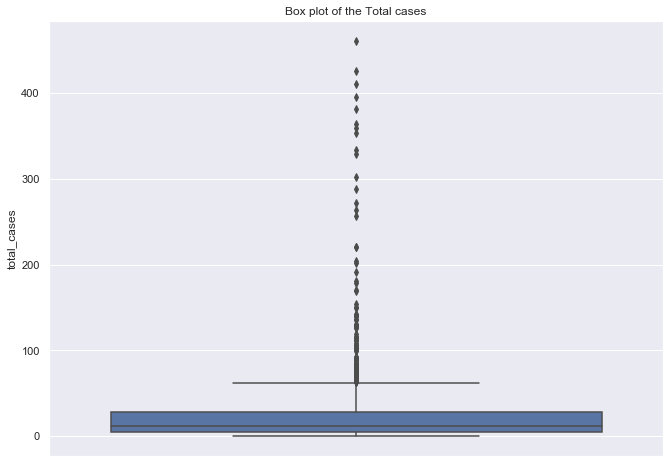

In [20]:
sns.boxplot(new_df.total_cases,orient='v')
plt.title("Box plot of the Total cases")

Text(0.5, 1.0, 'the Right skew distribution of total cases')

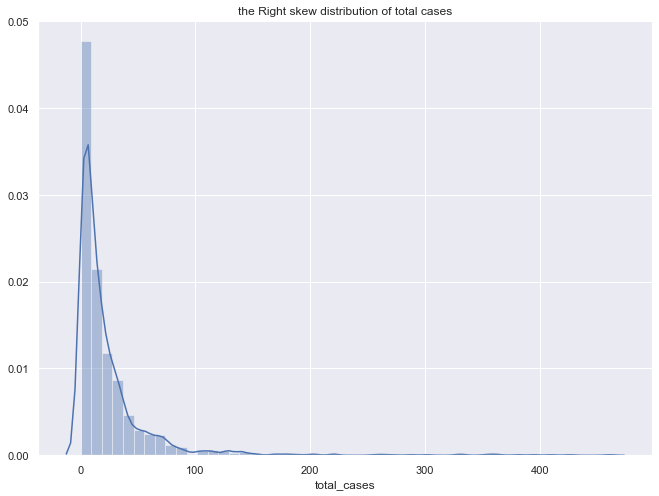

In [21]:
sns.distplot(new_df.total_cases)
plt.title("the Right skew distribution of total cases")

The above plot shows that the distribution of total cases is skewed towards right

###### d). Find the mean, min, max and standard deviation of total_cases by cityd). Find the mean, min, max and standard deviation of total_cases by city

In [22]:
new_df.groupby('city')['total_cases'].mean()

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

In [23]:
new_df.groupby('city')['total_cases'].min()

city
iq    0
sj    0
Name: total_cases, dtype: int64

In [24]:
new_df.groupby('city')['total_cases'].max()

city
iq    116
sj    461
Name: total_cases, dtype: int64

In [25]:
new_df.groupby('city')['total_cases'].std()

city
iq    10.765478
sj    51.381372
Name: total_cases, dtype: float64

All the above statistics show that the difference between the two cities is significant and the city sj has 

###### e). Read the relationship between mean and standard deviation from the link given here and describe the data of total_cases by city, if there is too much variation or too little variation https://www-users.york.ac.uk/~mb55/msc/applbio/week3/sd_text.pdf

###### 5. Create a temp data frame by grouping the total_cases by weekofyear and draw a histogram of total_cases and provide insights based on the distribution.


Text(0.5, 1.0, 'Histogram of the total cases based on weeks')

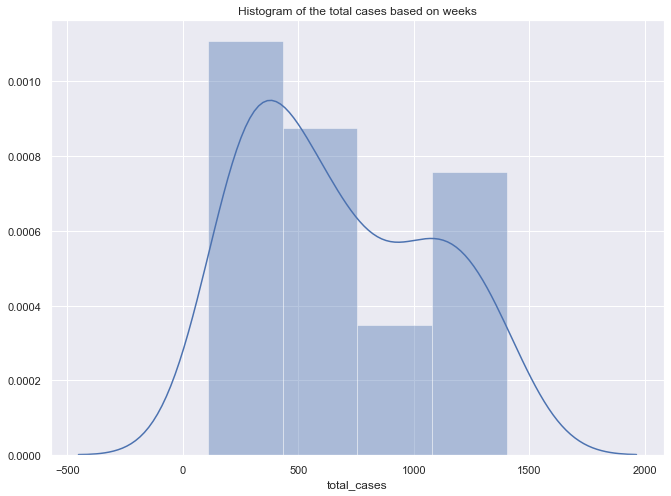

In [27]:
temp = new_df[['total_cases','weekofyear']].groupby('weekofyear')['total_cases'].sum().reset_index()
sns.distplot(temp.total_cases)
plt.title("Histogram of the total cases based on weeks")

Text(0.5, 1.0, 'Scatterplot of Week of year and total cases')

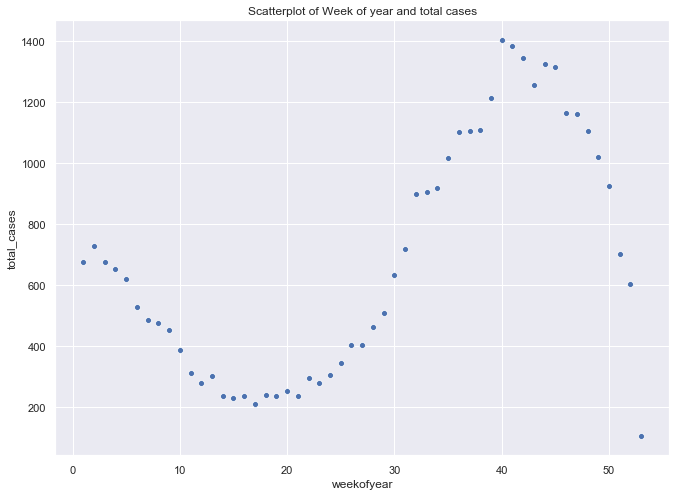

In [28]:
sns.scatterplot(temp.weekofyear, temp.total_cases)
plt.title("Scatterplot of Week of year and total cases")

# Assignment 2 - Questions

In [63]:
assign_2 = new_df

In [64]:
assign_2.shape

(1456, 25)

## <font color='green'> Make an 80-20 stratified split based on the target data </font>

In [65]:
y = assign_2['total_cases']
X = assign_2.drop('total_cases',axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)

#### ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

### The stratified train, test split throws error because the Y contains values with a single frequency. In order to do the stratified split the frequency of each value should be greater than 1. The below value_counts shows that there are few records which have a single frequency......

Stratified sampling aims at splitting a data set so that each split is similar with respect to something. In a classification setting, it is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set

In [66]:
y.value_counts()

0      100
6       71
3       70
5       70
2       69
      ... 
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

#### lets remove the reords which do not have frequency greater than 1

In [67]:
# assign_2.to_csv("data_assignment_2.csv",index=False)

In [68]:
assign_2.drop(['weekofyear', 'week_start_date'],1,inplace=True)
assign_2 =  assign_2.groupby('total_cases').filter(lambda x: len(x) > 1)
y = assign_2['total_cases']
X = assign_2.drop('total_cases',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)

## <font color='green'> Preprocess the data (Encode the categorical features and Standardize the numerical features) </font>

In [69]:
categoricalFeatureNames = ["city", 'year']
#convert the attributes listed above to categorical form
for var in categoricalFeatureNames:
    X_train[var] = X_train[var].astype("category")
    X_test[var] = X_test[var].astype("category")
    
X_train_dummies = pd.get_dummies(X_train[['city','year']])
X_test_dummies = pd.get_dummies(X_test[['city','year']])

In [70]:
scaler = StandardScaler()
standardized_numeric_data = scaler.fit_transform(X_train.drop(columns=['city', 'year']))
X_train_np = np.concatenate((standardized_numeric_data,np.array(X_train_dummies)),axis=1)
standardized_numeric_data = scaler.transform(X_test.drop(columns=['city', 'year']))
X_test_np = np.concatenate((standardized_numeric_data,np.array(X_test_dummies)),axis=1)

## <font color='green'> Build a stochastic gradient descent regressor, train the model </font>

In [37]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=5000, random_state=42)
sgd.fit(X_train_np,y_train)
y_predict = sgd.predict(X_test_np)
y_predict_train = sgd.predict(X_train_np)
rmse_train = sqrt(mean_squared_error(y_train, y_predict_train))
rmse = sqrt(mean_squared_error(y_test, y_predict))
print("RMSE error on train dataset ",rmse_train)
print("RMSE error on test dataset",rmse)

RMSE error on train dataset  16.312257483417493
RMSE error on test dataset 15.900844937897077


### List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy.

The Parameters that can be tuned for SGD are:
    
    1.  Alpha - Constant that multiplies the regularization term. Defaults to 0.0001. This value penalizes the amount of regularization 
    
    2. l1_ratio: The value of L1 regularization with respect to 1. The lower the value, the more L1 regularization in the fit
    
    3. learning_rate - The constant that gets multiplied to the cost function 
    
    4. loss - The type of loss function used in calculating the error, in this training fit the loss is mean square error
    
    5. max_iter- The number of iterations to update the final new co-efficients
    
    
    

In [38]:
#by setting the number of iterations to 5000, the model is overfitting.
#Hence I dropped the max_iter to 1000 and added increased the penality factor to 0.5
#with this the model has regularized better.

sgd_clf_2 = SGDRegressor(max_iter=1000,alpha=0.5, random_state=42)
sgd_clf_2.fit(X_train_np,y_train)
y_predict = sgd_clf_2.predict(X_test_np)
y_predict_train = sgd_clf_2.predict(X_train_np)
rmse_train = sqrt(mean_squared_error(y_train, y_predict_train))
print("RMSE error on train dataset ",rmse_train)
rmse = sqrt(mean_squared_error(y_test, y_predict))
print("RMSE error on test dataset ", rmse)

RMSE error on train dataset  19.128320365537203
RMSE error on test dataset  18.562304718211216


In [39]:
#While the alpha value is bit high in the above model, reducing it to 0.1 has
#helped in reducing the error further and also by changing the learning rate, to adaptive, 
#the model converged with 2000 iterations

sgd_clf_3 = SGDRegressor(max_iter=2000,alpha=0.1,learning_rate="adaptive", random_state=42)
sgd_clf_3.fit(X_train_np,y_train)
y_predict = sgd_clf_3.predict(X_test_np)
y_predict_train = sgd_clf_3.predict(X_train_np)
rmse_train = sqrt(mean_squared_error(y_train, y_predict_train))
print("RMSE error on train dataset ",rmse_train)
rmse = sqrt(mean_squared_error(y_test, y_predict))
print("RMSE error on test dataset ", rmse)

RMSE error on train dataset  18.13928155462619
RMSE error on test dataset  17.610976271056405


### Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

##### As our dependable variable is a Numeric value, I believe using Root Means Square Error will be the best metric to evaluate

In [40]:
rmse = sqrt(mean_squared_error(y_test, y_predict))
rmse

17.610976271056405

## Plot Learning curve and provide insights

###### Learning curve with respect to iterations

In [41]:
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
def plot_learning_curves(X_train, y_train, X_val, y_val,iterations):
    train_errors, val_errors = [], []
    
    for m in range(1, iterations):
        model = SGDRegressor(max_iter=m,alpha=0.1,learning_rate="adaptive", random_state=42)
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    
    figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    plt.title("Train and test loss with Iterations")
    
    plt.plot( range(1,iterations),np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("The number of Iterations of SGD")
    plt.ylabel("The RMSE error")
    plt.ylim([16,21])
    plt.legend()

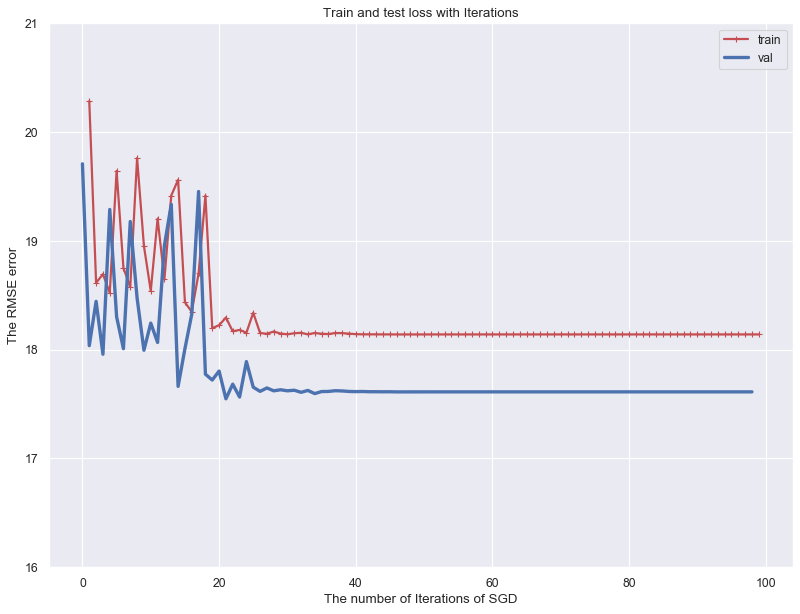

In [42]:
plot_learning_curves(X_train_np, y_train, X_test_np, y_test,100)

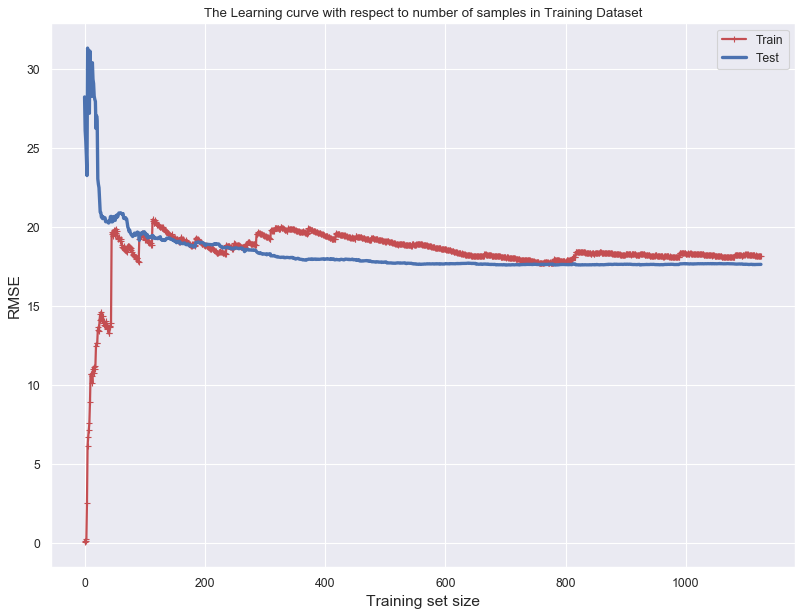

In [43]:
train_errors, test_errors = [], []
for m in range(1, len(X_train_np)):
    sgd = SGDRegressor(max_iter=800,alpha=0.1,learning_rate="adaptive", random_state=42)
    sgd.fit(X_train_np[:m], y_train[:m])
    y_train_predict = sgd.predict(X_train_np[:m])
    y_test_predict = sgd.predict(X_test_np)
    train_errors.append(sqrt(mean_squared_error(y_train[:m], y_train_predict)))
    test_errors.append(sqrt(mean_squared_error(y_test, y_test_predict)))
    
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(train_errors, "r+-", linewidth=2, label = "Train")
plt.plot(test_errors, "b-", linewidth=3, label = "Test")
plt.title("The Learning curve with respect to number of samples in Training Dataset")
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.legend()

## Analysis
We can see that error remained constant for training and test set when the number of iterations are 200. From this we can conlude that the increase in number of records in training set does nota add much value and just 200 records are enough to 
train the model and thus save resources.


There is little fluctuation on the train error after 200 iterations, This might be because of the change in data and hence the model not able to predict well. Overall the data looks consistent and this looks like a generalized model, because the train error is not going down or up with increase in rows

Also, upto 40 iterations are enough to get to a steady train and test error

## <font color='green'> Assignment 3</font>

### <font color='blue'> 1. Write a brief statement: Is it required to consider the repeating features in the model? (For example: precipitation_amt_mm and reanalysis_sat_precip_amt_mm. Similarly there are others). List which features you will choose in this model. Select the required columns in the dataframe and drop the others.</font>

In [71]:
assign_3 = new_df
assign_3.drop('prec_amt_mm',axis=1,inplace=True)
# print(assign_3.columns)
assign_3.shape

(1456, 22)

In [72]:
c = assign_3.corr().abs()
sort = c.unstack() 
correlated_cols = sort.sort_values(kind="quicksort") 
correlated_cols = correlated_cols.dropna() 
correlated_cols[(correlated_cols.values > 0.9) & (correlated_cols.values <1)]

re_an_avg_temp_k            re_an_air_temp_k              0.901969
re_an_air_temp_k            re_an_avg_temp_k              0.901969
re_an_max_air_temp_k        re_an_tdtr_k                  0.918764
re_an_tdtr_k                re_an_max_air_temp_k          0.918764
re_an_dew_point_temp_k      re_an_specific_hd_g_per_kg    0.997045
re_an_specific_hd_g_per_kg  re_an_dew_point_temp_k        0.997045
dtype: float64

    When two attributes give information about the same thing then they are duplicates and these might trick our model in    terms of rule generation. As the two attributes have same data, the rules generated will be same thus, there wont be any use of having such duplicate columns

So looking at the variables, I am dropping the columns which have high corelation (0.9 >).
These variables are :

    re_an_max_air_temp_k - This is intercorelated with re_an_tdtr_k. Hence I am dropping this as re_an_tdtr_k is the difference between max and min temparature of the day
    
    
    re_an_dew_point_temp_k - This is corelated with  re_an_specific_hd_g_per_kg. This says that the pressure is highly dependent on temparature. Hence droppping the pressure
    

In [81]:
assign_3 = assign_3.drop(['re_an_max_air_temp_k','re_an_dew_point_temp_k'],axis=1)

### <font color='blue'>2. Preprocess the data</font>


    A) Encode the categorical features: Already created in assignment 2


In [50]:
# categoricalFeatureNames = ["city", 'year']

# #convert the attributes listed above to categorical form

# for var in categoricalFeatureNames:
#     assign_3[var] = assign_3[var].astype("category")
    
# X_assign_3_dummies = pd.get_dummies(X_train[['city','year']])

     B) Abbreviate the column names - Worked on it in assignment 1

In [51]:
# assign_3.columns = assign_3.columns.str.replace(r"reanalysis", "re_an")
# assign_3.columns = assign_3.columns.str.replace(r"humidity", "hd")
# assign_3.columns = assign_3.columns.str.replace(r"precipitation","prec")

      D) Handle NaNs - Filled with Mean in assignment 1

In [52]:
# assign_3 = assign_3.fillna(method='ffill')

     E) Convert percentage to value/100 (check which option gives better result, as-is or divided/100)

In [53]:
#Converting to just value did not improve the accuracy much. Just with percentage, I got a decent model

      F) Scale the vegetation features (ndvi*) as 0, 1 (0 <= 0.25 and 1 > 0.25) as it is in scale of 0 to 0.5. Retain as is or use other scaling based on how model performs.

In [54]:
#I found th scaling option to be better with slight improve in the model performance
veg_features = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
for i in veg_features:
    assign_3[i][assign_3[i] <= 0.25] = 0
    assign_3[i][assign_3[i] > 0.25] = 1
    assign_3[i] = assign_3[i].astype('category')

      C & G) Standardize the numerical features, Make an 80-20 train-test split

In [55]:
assign_3.to_csv("Assignment_3_data.csv",index=False)

In [56]:
X_numeric = assign_3.drop(columns=['city', 'year','total_cases',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw'])
assign_3['year'] = assign_3.year.astype('category')
dummy_attributes = assign_3[['city', 'year',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
X_dummies = pd.get_dummies(dummy_attributes)
X_data = pd.concat([X_numeric,X_dummies ],axis=1)
y_data = assign_3['total_cases']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20)

scaler = StandardScaler()
standardized_numeric_data = scaler.fit_transform(X_train[X_numeric.columns])
X_train_np = np.concatenate((standardized_numeric_data,np.array(X_train[X_dummies.columns])),axis=1)
standardized_numeric_data_test = scaler.transform(X_test[X_numeric.columns])
X_test_np = np.concatenate((standardized_numeric_data_test,np.array(X_test[X_dummies.columns])),axis=1)

### <font color='blue'>3.Build a Linear SVR regressor, train the model</font>

<font color='green'>      a. Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics. </font>
    
    I chose RMSE error (Root Mean Square Error). It is measure on how far from the regression line the data points are. THe RMSE error gives low weightage to points around the best fit line and high weightage to points farther from the line. It basically tells us how concentrated the data is arounf the line of best fit. The high error on train and low on test says that the model is under fitting and we can increase its complexity.
   

In [57]:
svr_lin = LinearSVR()
# With C as 1 and the l1 at 0 model is very naive and has high error.

svr_lin.fit(X_train_np,y_train)
y_train_predict = svr_lin.predict(X_train_np)
y_test_predict = svr_lin.predict(X_test_np)
train_errors= sqrt(mean_squared_error(y_train, y_train_predict))
test_errors = sqrt(mean_squared_error(y_test, y_test_predict))
print("The training error of the model is ", train_errors)
print("The testing error of the model is ", test_errors)

The training error of the model is  18.788224893513494
The testing error of the model is  15.242859091006817


In [58]:
svr_lin = LinearSVR(C=10, loss = 'epsilon_insensitive',epsilon=0.3)
# With a higher Slack value of 10 and L1 regularization set at 0.3, I got reduction in the test and traing error

svr_lin.fit(X_train_np,y_train)
y_train_predict = svr_lin.predict(X_train_np)
y_test_predict = svr_lin.predict(X_test_np)
train_errors= sqrt(mean_squared_error(y_train, y_train_predict))
test_errors = sqrt(mean_squared_error(y_test, y_test_predict))
print("The training error of the model is ", train_errors)
print("The testing error of the model is ", test_errors)


The training error of the model is  18.277713635133672
The testing error of the model is  14.829330776362132


<font color='green'>      b. List the hyper-parameters that can be tuned in Linear SVR. Explain the meaning of each hyper-parameter. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. </font>
    
    
    The Linear SVR is similar to the Traditional SVR but it supports only linear kernel and is implemented in terms of liblinear rather than libsvm.

There are two main parameters to tune in the Linear version of SVR:
  1. The choice of penalties - The penality is represented by C. This is the amount of influence slack variables has on the function. Slack variable is the non-linear points which are tough to classify. Hence, we will ignore these points. The C is the way of saying how much to ignore.  With high C value the models puts penalities on the slack points and hence creates an over-complicated one.
  
  2. Loss functions- The Lasso (L1) loss function is the standard way of entering the value in Linear SVR. By setting loss as epsilon insensitive we are saying it to start with L1 regularization and with epsilon of 0.3 I got least error

<font color='green'>      c. Plot Learning curve and provide insights </font>


    From the learning curve we can see that the error in train and test samples has stabilized after 150 samples. But as this is a linear kernel, it was not able to reduce the error further and with increase in the sample size the model did not learn much

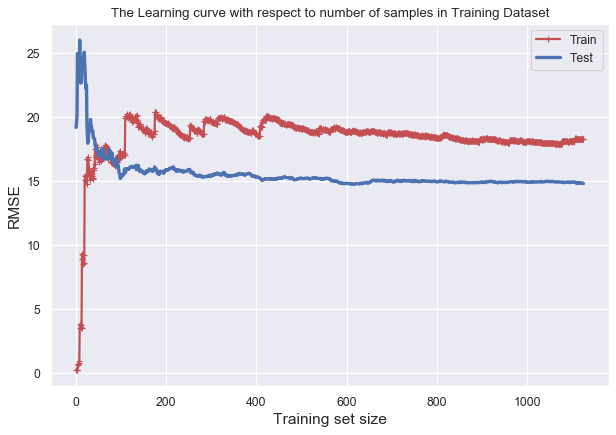

In [59]:
train_errors, test_errors = [], []
for m in range(1, len(X_train_np)):
    svr_lin.fit(X_train_np[:m], y_train[:m])
    y_train_predict = svr_lin.predict(X_train_np[:m])
    y_test_predict = svr_lin.predict(X_test_np)
    train_errors.append(sqrt(mean_squared_error(y_train[:m], y_train_predict)))
    test_errors.append(sqrt(mean_squared_error(y_test, y_test_predict)))
    
figure(num=None, figsize=(9,6), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(train_errors, "r+-", linewidth=2, label = "Train")
plt.plot(test_errors, "b-", linewidth=3, label = "Test")
plt.title("The Learning curve with respect to number of samples in Training Dataset")
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.legend()

### <font color='blue'>4. Build a SVR model with Linear Kernel, train the model

<font color='green'>    a. Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.
    
      I chose RMSE error (Root Mean Square Error). It is measure on how far from the regression line the data points are. THe RMSE error gives low weightage to points around the best fit line and high weightage to points farther from the line. It basically tells us how concentrated the data is arounf the line of best fit
    
<font color='green'>      b. List the hyper-parameters that can be tuned in SVR model with Linear Kernel. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy. 
  
  
      There are mainly Three parameters that can be tweaked to improve the performance of model
    
    C- Regularization Parameter - The Cost function on the slack variable. This controls the train error and test error relationship. To have a highly fitted model C value should be high

    gamma- The kernel co-efficient for Non-linear functions.  The degree to which we can use the kernel, it is used to set the amount of N dimensions we can throw data and a complexity manager for kernel


    Kernel - The type of Kernel for creating the hyperplane. This is the kernel matrix or kernel trick. There are different kernels A linear kernel throws the data in N dimensions and plots a linear curve, The Polynomial kernel increases the complexity and plots a curved hyperplane, Radial and hyperbolic ca learn any complex patterns.

In [60]:
lin_svr = SVR(kernel = 'linear')
lin_svr.fit(X_train_np,y_train)
y_train_predict = lin_svr.predict(X_train_np)
y_test_predict = lin_svr.predict(X_test_np)
train_errors= sqrt(mean_squared_error(y_train, y_train_predict))
test_errors = sqrt(mean_squared_error(y_test, y_test_predict))
print("The training error of the model is ", train_errors)
print("The testing error of the model is ", test_errors)

The training error of the model is  18.764585200997427
The testing error of the model is  15.225338132781038


In [61]:
lin_svr = SVR(C=100,kernel = 'linear',epsilon=0.3,coef0=0.1,gamma='auto')
lin_svr.fit(X_train_np,y_train)
y_train_predict = lin_svr.predict(X_train_np)
y_test_predict = lin_svr.predict(X_test_np)
train_errors= sqrt(mean_squared_error(y_train, y_train_predict))
test_errors = sqrt(mean_squared_error(y_test, y_test_predict))
print("The training error of the model is ", train_errors)
print("The testing error of the model is ", test_errors)

The training error of the model is  18.218726122735898
The testing error of the model is  14.773372508512008


<font color='green'> c. Plot Learning curve and provide insights
    
    THe Learning curve of Linear SVM with kernel is similar to the linear SVR, as these two are build from the same concepts. It is expected to have same output. The only difference I noticed is the time taken to perform training. The Linear SVR took very less time when comoared to the SVR with Kernel. Apart from it the information is same as above. Stabilizing after 150 samples

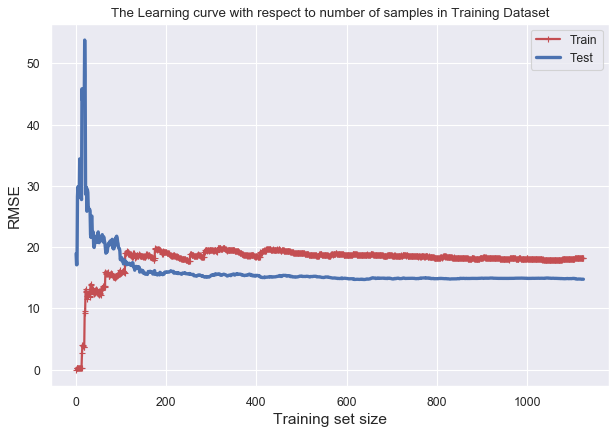

In [62]:
train_errors, test_errors = [], []
for m in range(1, len(X_train_np)):
    lin_svr.fit(X_train_np[:m], y_train[:m])
    y_train_predict = lin_svr.predict(X_train_np[:m])
    y_test_predict = lin_svr.predict(X_test_np)
    train_errors.append(sqrt(mean_squared_error(y_train[:m], y_train_predict)))
    test_errors.append(sqrt(mean_squared_error(y_test, y_test_predict)))
    
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')    
plt.plot(train_errors, "r+-", linewidth=2, label = "Train")
plt.plot(test_errors, "b-", linewidth=3, label = "Test")
plt.title("The Learning curve with respect to number of samples in Training Dataset")
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.legend()

### <font color='blue'> 5. Create a submission file which has predictions for both cities in the submission format </font>

In [55]:
test_df = pd.read_csv("C:/Users/mohad/Documents/USF/DSP/assignment_2/dengue_features_test.csv")
test_df.columns = test_df.columns.str.replace(r"reanalysis", "re_an")
test_df.columns = test_df.columns.str.replace(r"humidity", "hd")
test_df.columns = test_df.columns.str.replace(r"precipitation","prec")
test_df = test_df.fillna(method='ffill')

veg_features = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
for i in veg_features:
    test_df[i][test_df[i] <= 0.25] = 0
    test_df[i][test_df[i] > 0.25] = 1
    test_df[i] = test_df[i].astype('category')

In [62]:
X_test_numeric = test_df.drop(columns=['city', 'year','re_an_max_air_temp_k','re_an_dew_point_temp_k','prec_amt_mm',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','week_start_date','weekofyear'])
test_df['year'] = test_df.year.astype('category')
dummy_attributes = test_df[['city', 'year',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
# X_test_dummies = pd.get_dummies(dummy_attributes)
X_test_dummies = dummy_attributes.reindex(columns = X_dummies.columns, fill_value=0)

test_df_standardized = scaler.transform(X_test_numeric)
test_df_np = np.concatenate((test_df_standardized,np.array(X_test_dummies)),axis=1)

In [63]:
test_y_predict = lin_svr.predict(test_df_np)
submission_df= test_df[["city", "year","weekofyear"]]
submission_df["total_cases"] = test_y_predict
submission_df.to_csv("submission_aditya_2.csv",index=False)

In [ ]:
X_dummies = pd.get_dummies(dummy_attributes)

### <font color='blue'> 7. Compare the Model Evaluation metric of SGD (Assignment 2), Linear SVR and SVR with Linear Kernel and state which model performed better along with reason why you consider so. </font>

#####  I got better performance using SVR

On SGD, The error is 18.14 on train and 17.38 on test dataset

Using Linear SVR the error is 18.7 on train and 11.3 on test

Using just SVR the error is 18.6 on train and on 11.2 test


### <font color='green'> Assignment 4 </font>
Use the merged data frame from Assignment 1,2  and 3 for this assignment

This Assignment focuses on data preprocessing and model building.In this assignment you need to use Neural Network

##### 3. Optional: Build a Neural Network Multi-Layer Perceptron Regressor model (you can use sklearn neural network MLP Regressor)

In [16]:
assign_4 = pd.read_csv("Assignment_3_data.csv")

X_numeric = assign_4.drop(columns=['city', 'year','total_cases',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw'])
assign_4['year'] = assign_4.year.astype('category')
dummy_attributes = assign_4[['city', 'year',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
X_dummies = pd.get_dummies(dummy_attributes)
X_data = pd.concat([X_numeric,X_dummies ],axis=1)

y_data = assign_4['total_cases']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20)

scaler = StandardScaler()
standardized_numeric_data = scaler.fit_transform(X_train[X_numeric.columns])
X_train_np = np.concatenate((standardized_numeric_data,np.array(X_train[X_dummies.columns])),axis=1)
standardized_numeric_data_test = scaler.transform(X_test[X_numeric.columns])
X_test_np = np.concatenate((standardized_numeric_data_test,np.array(X_test[X_dummies.columns])),axis=1)

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(40,10), max_iter= 150, verbose=True)
mlp_reg.fit(X_train_np, y_train)

Iteration 1, loss = 403.05630519
Iteration 2, loss = 397.98059526
Iteration 3, loss = 392.74906566
Iteration 4, loss = 387.09478076
Iteration 5, loss = 381.33700346
Iteration 6, loss = 374.75768100
Iteration 7, loss = 367.58189082
Iteration 8, loss = 359.31214496
Iteration 9, loss = 350.29217120
Iteration 10, loss = 340.30709521
Iteration 11, loss = 328.87750098
Iteration 12, loss = 316.49537108
Iteration 13, loss = 302.39200615
Iteration 14, loss = 287.09826622
Iteration 15, loss = 270.92295907
Iteration 16, loss = 255.29466627
Iteration 17, loss = 239.35916688
Iteration 18, loss = 225.84249191
Iteration 19, loss = 213.11786289
Iteration 20, loss = 203.98149009
Iteration 21, loss = 196.93210939
Iteration 22, loss = 191.19055804
Iteration 23, loss = 187.33216837
Iteration 24, loss = 184.52119103
Iteration 25, loss = 182.03095208
Iteration 26, loss = 180.33000491
Iteration 27, loss = 178.66274508
Iteration 28, loss = 176.91114735
Iteration 29, loss = 175.51298863
Iteration 30, loss = 17

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(40, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=150, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [17]:
y_train_predict = mlp_reg.predict(X_train_np)
y_test_predict = mlp_reg.predict(X_test_np)
train_errors= sqrt(mean_squared_error(y_train, y_train_predict))
test_errors = sqrt(mean_squared_error(y_test, y_test_predict))
print("The training error of the model is ", train_errors)
print("The testing error of the model is ", test_errors)

The training error of the model is  13.03532167010069
The testing error of the model is  14.809773267217437


##### Optional: Evaluate the model and compare it with the previous three assignments

I got better performance using SVR
On SGD, The error is 18.14 on train and 17.38 on test dataset

Using Linear SVR the error is 18.7 on train and 11.3 on test

Using just SVR the error is 18.6 on train and on 11.2 test

The error using MLP regressor with 40,10 layers is 11.35 on test data and 13.73 on train data

##### 1. Load the data (both features and label data set as before)
##### 2. Preprocess the data - briefly comment if any special preprocessing is adopted to suit Neural Network
##### 3. Add a new column called 'above_average' with value 1 or 0. 1 if the total_cases > median of total_cases

In [18]:
assign_4 = pd.read_csv("Assignment_3_data.csv")

assign_4.total_cases[assign_4.total_cases <= 11] = 0 #converting the dependent varibale to categorical
assign_4.total_cases[assign_4.total_cases > 11] = 1 #by creating threshold of median

assign_4 = assign_4.rename(columns={'total_cases': 'above_average'}) #renaming the column


X_numeric = assign_4.drop(columns=['city', 'year','above_average',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw'])
assign_4['year'] = assign_4.year.astype('category')
dummy_attributes = assign_4[['city', 'year',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
X_dummies = pd.get_dummies(dummy_attributes)
X_data = pd.concat([X_numeric,X_dummies ],axis=1)
y_data = assign_4['above_average']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20)
scaler = StandardScaler()
standardized_numeric_data = scaler.fit_transform(X_train[X_numeric.columns])
X_train_np = np.concatenate((standardized_numeric_data,np.array(X_train[X_dummies.columns])),axis=1)
standardized_numeric_data_test = scaler.transform(X_test[X_numeric.columns])
X_test_np = np.concatenate((standardized_numeric_data_test,np.array(X_test[X_dummies.columns])),axis=1)

##### 4. Build a Neural Network MLP Classifier on the 'above_average' column with 80/20 train/test split

In [19]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(15,10),max_iter=100,momentum=0.7,activation="relu") 

#building a 15,10 layer network with 100 iterations and 0.0001 learning rate
mlp_clf.fit(X_train_np, y_train) #Training the model
test_y_pred = mlp_clf.predict(X_test_np) #Predicting on test dataset
train_y_pred = mlp_clf.predict(X_train_np)

print("Accuracy of model on train dataset",accuracy_score(y_train, train_y_pred))
print("Accuracy of model on test dataset",accuracy_score(y_test, test_y_pred))

Accuracy of model on train dataset 0.8855368234250222
Accuracy of model on test dataset 0.7624113475177305


from cf_matrix import make_confusion_matrix
#I found this interesting way of visualizing confusion matrix from 
https://github.com/DTrimarchi10/confusion_matrix

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

##### 7. Explain the meaning of Precision, Recall and F1-Score and why these are used to evaluate Classification models (instead of using Accuracy as a metric). Evaluate the classifier using Precision, Recall and F1 score values

As the dataset is balanced we can rely on the accuracy as metric for evaluation.

Along with that I believe False Negative score(Recall) is important. Because saying a city as having less number of cases is more dangerous than predicting a city as having more number of cases

Cause I think if the model predicts correctly about the city having high number of cases then the medical team can be prepare well. But if the city having high number of cases is predicted by model as less than average then the mdical team might not take that city seriously and hence the  people in that city might affect badly

<Figure size 720x504 with 0 Axes>

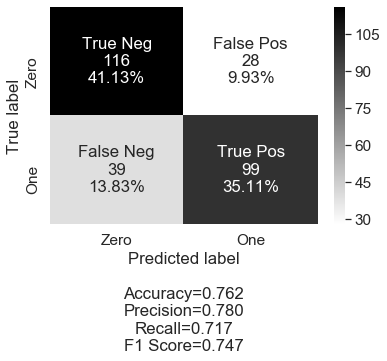

Accuracy of model on Test dataset 0.7624113475177305


In [21]:
cm = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show()
print("Accuracy of model on Test dataset",accuracy_score(y_test, test_y_pred))

### <font color='green'> I had a lot of confusion about precision and Recall hence I have created notes </font>

## Case 1:


Let's understand the metrics in terms of business context

Suppose you are owner of ferrari company and you are manufacturing limited edition super car.

The head of marketing department has 10,000 customer details who they think to advertise..

You have created a model which predicts whether a customer will buy the car or not. According to the model you will advertise to only those which the model tells as buyers

So in this case your model can do two mistakes

1) Precision: Predicts non-buyer as buyer this is false positive (falsely predicting that the customer will buy)

2) Recall : Predicts buyer as non-buyer this is false negative (falsely predicting that the customer will not buy)

Now which metric do you think is important?
For this case,If model predicts a non-buyer as buyer then company will loose small amount by advertising to non-buyer and the amount they spent on advertising for that person will be low (at most 50$)..this is precision (falsely predicted as positive)..

But on the other side of coin, If model predicts a buyer as non-buyer then the company is not going to advertise the car to that buyer and at the end the company is going to loose that customer who had the potential to buy that car. This is recall (falsely predicted as negative)..

So in this case the recall is the metric to optimize..

## Case 2:


Let's put you in another shoe..

You are manager of a branch and there are 4000 loan applications.

You have created a model which predicts whether an applicant can be granted loan or not..

So in this case your model can do two mistakes

1) Precision: Predicts non-eligible applicants as eligible this is false positive (falsely predicting that the applicant can be granted loan)

2) Recall: Predicts eligible applicants as non-eligible this is false negative (falsely predicting that the loan application should be rejectet.)

## F1 Score

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

## Test data prediction

In [22]:
test_df = pd.read_csv("C:/Users/mohad/Documents/USF/DSP/assignment_2/dengue_features_test.csv")
test_df.columns = test_df.columns.str.replace(r"reanalysis", "re_an")
test_df.columns = test_df.columns.str.replace(r"humidity", "hd")
test_df.columns = test_df.columns.str.replace(r"precipitation","prec")
test_df = test_df.fillna(method='ffill')

veg_features = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
for i in veg_features:
    test_df[i][test_df[i] <= 0.25] = 0
    test_df[i][test_df[i] > 0.25] = 1
    test_df[i] = test_df[i].astype('category')

In [23]:
X_test_numeric = test_df.drop(columns=['city', 'year','re_an_max_air_temp_k','re_an_dew_point_temp_k','prec_amt_mm',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','week_start_date','weekofyear'])
test_df['year'] = test_df.year.astype('category')
dummy_attributes = test_df[['city', 'year',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
# X_test_dummies = pd.get_dummies(dummy_attributes)
X_test_dummies = dummy_attributes.reindex(columns = X_dummies.columns, fill_value=0)

test_df_standardized = scaler.transform(X_test_numeric)
test_df_np = np.concatenate((test_df_standardized,np.array(X_test_dummies)),axis=1)

In [29]:
test_y_predict = mlp_reg.predict(test_df_np)
submission_df= test_df[["city", "year","weekofyear"]]
submission_df["total_cases"] = test_y_predict
submission_df.to_csv("submission_aditya_4.csv",index=False)